# Introduction to Natural Language Processing with Python


## What is NLP?

Natural language processing is a way for computers to analyze, understand, and derive meaning from human language. With appropriate use and organization, NLP can be used to help developers perform a variety of tasks, including summarization, translation, named entity recognition, relationship extraction, sentiment analysis, speech recognition, and topic segmentation for a given dataset or group of texts.

## What can we use it for?

Things like chatbots, voice-to-text software, and customer service sentiment analysis are examples of NLP applications. The use of (and development of tools for) NLP has experienced rapid growth over the last decade and is currently being integrated into a variety of fields. 

For example, a retailer on Amazon may run a sentiment analysis on all comments for a certain product. This could reveal general attitudes towards both the company and the item in question, ultimately leading to improvements and adjustments. On another hand, Siri, Apple's personal voice assistant, is the almagamation of years of work in NLP - Siri can recognize, conceptualize, and respond to a wide array of questions and comments. This not only improves the iPhone user experience in general but also increases the accessibility of the product.

## Basic Terminology

__Corpus__ (plural: corpora) is defined as a large collection of liguistic data. In other words, corpora serve as our datasets, or our information to process and train models on.

__Tokenization__ is the process of segmenting text into words, phrases, sentences etc. This is one of the first steps in processing the text into workable components.

__Part-of-speech (POS) tagging__ involves assigning word types (parts of speech) to tokens, like _verb_, _noun_, _preposition_, etc. 

__Dependency Parsing__ is the process of assigning syntactic dependency labels that describe the relations between individual tokens. For example, in the sentence _The brown dog ran through the park_, dependency parsing would recognize that _brown_ is modifying the subject of the sentence, _dog_.

__Lemmatization__ is defined as assigning the base form of words. For example, the lemma of “was” is “be”, and the lemma of “rats” is "rat".

__Sentence Boundary Detection (SBD)__ is responsible for finding and segmenting individual sentences within a text. 

__Named Entity Recognition (NER)__ involves labelling named “real-world” objects, like persons, companies, or locations. For example, in some instances, we want "Amazon" to be recognized as an electronic company as opposed to the rainforest.

__Similarity__ is the process of comparing words, phrases, and documents to see how similar they are to each other. This is usually done using the cosine similarity between two vectors.


# spaCy

`spaCy` describes itself as industrial strength natural language processing in Python. Its designed to work with the rest of the Python AI ecosystem including `TensorFlow`, `PyTorch`, `scikit-learn`, `Gensim`. Though a little less known than NLTK, spaCy tends to be a little faster and functions well for large-scale information processing:

![nltk_spacy](img/nltk_spacy.png)

In [4]:
import spacy
from spacy import displacy

We begin by importing the necessary packages, `spaCy` being the most notable. We then load the English statistical model (which is set up as its own python package) - this is the main program we will be working with. Using a model for a specific language enables `spaCy` to predict linguistic annotations – for example, whether a word is a verb or a noun. Though some of spaCy's features are available without a language model, most of its functions require one. 

In [5]:
nlp = spacy.load('en')

First, we'll walk through some of the basic functions of spaCy, based on the definitions above. We begin by reading in a few simple sentences, just to get a feel for how the package works.

In [6]:
doc = nlp("I'm having such a wonderful day in Ann Arbor! It is sunny out and there are flowers. Do you want to get some ice cream with Ms. Ellen?")

> When you call nlp on a text, spaCy first tokenizes the text to produce a Doc object. The Doc is then processed in several different steps – this is also referred to as the processing pipeline. The pipeline used by the default models consists of a tagger, a parser and an entity recognizer.

![spacy_pipeline](img/pipeline.svg)

You can create your own customize processing pipeline by removing or adding new processes but we do not cover that in this workshop.

## Tokenizing

When we read something in with `nlp`, spaCy automatically tokenizes it. For example, it breaks _I'm_ into _I_ and _'m_, and each word is its own element. The `doc` object can be indexed to access individual tokens. 

In [7]:
for i, token in enumerate(doc[:15]):
    print(i, token)

0 I
1 'm
2 having
3 such
4 a
5 wonderful
6 day
7 in
8 Ann
9 Arbor
10 !
11 It
12 is
13 sunny
14 out


We can also see how well the sentence boundary detection works. We view all the individual sentences from the paragraph by iterating through the `sents` attribute.

In [8]:
for sent in doc.sents:
    print(sent)

I'm having such a wonderful day in Ann Arbor!
It is sunny out and there are flowers.
Do you want to get some ice cream with Ms. Ellen?


You can look at the token tags and POS using the `tag_` and `pos_` attributes. If you leave off the `_`, you will get the integer equivalent. A `token` object has a lot of attributes. Here we just look at a few. We'll use `pandas` to put it in a DataFrame for easier visualization. 

In [9]:
import pandas as pd
list_tokens = []
for token in doc:
    list_tokens.append((token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.is_stop, token.is_sent_start))
df = pd.DataFrame(list_tokens, columns=['text','lemma','POS','tag','dependency','stopword','sentence_start'])
df

,text,lemma,POS,tag,dependency,stopword,sentence_start
0,I,-PRON-,PRON,PRP,nsubj,False,None
1,'m,be,VERB,VBP,aux,False,None
2,having,have,VERB,VBG,ROOT,False,None
3,such,such,ADJ,PDT,predet,True,None
4,a,a,DET,DT,det,True,None
5,wonderful,wonderful,ADJ,JJ,amod,False,None
6,day,day,NOUN,NN,dobj,False,None
7,in,in,ADP,IN,prep,True,None
8,Ann,ann,PROPN,NNP,compound,False,None
9,Arbor,arbor,PROPN,NNP,pobj,False,None


You can look at the named-entities using the `ent` attributes and iterating through them.

In [10]:
for entity in doc.ents:
   print(entity.text, entity.label_)

Ann Arbor GPE
Ellen PERSON


### spaCy `explain`

Since `spaCy` is filled with plenty of useful tools, it's easy not to know or lose track of what all the different abbreviations stand for. The `spacy.explain` method can be used to get the description for some of the abbreviations.

In [11]:
part_of_speech = ['GPE','ADP','dobj','cc']
for pos in part_of_speech:
    print('{} : {}'.format(pos, spacy.explain(pos)) )

GPE : Countries, cities, states
ADP : adposition
dobj : direct object
cc : coordinating conjunction


# Exercise

Print out all the proper nouns (PROPN) and persons (PERSON) in this paragraph.

In [12]:
paragraph = 'Shapovalov arrived in the Spanish capital without an ATP World Tour match win on clay. In fact, he owned just a 1-4 clay-court record on the ATP Challenger Tour. But the Canadian found some of his best tennis to become the youngest quarter-finalist and semi-finalist in event history. Against Zverev, he was attempting to become the youngest Masters 1000 finalist since 18-year-old Richard Gasquet battled to the championship match at Hamburg in 2005.'

In [31]:
# write Solution Here

## Visualization

`spaCy` has a built-in visualization package called `displaCy` that plots sentence dependencies and entity recognition.

### Dependency

Dependency parsing is the process of analyzing a sentence and assigning a syntactic structure to it: labeling the subject, the verb, etc., and how the different elements of the sentence depend on one another.

In [15]:
doc = nlp('The quick brown fox jumped over the lazy dog.')
options={'distance':100}
displacy.render(doc, style='dep', jupyter=True, options=options)

### Entity Recognition

Here is how `displaCy` works for named-entity recognition.

In [56]:
doc2 = nlp("TD Ameritrade, ProQuest, Google, Domino's and the University of Michigan are companies that hire data scientists in Ann Arbor")
colors = {'GPE': 'linear-gradient(0deg, #deebf7, #3182bd)',
         'ORG': 'linear-gradient(90deg, #fee6ce, #e6550d)'}
options = {'colors': colors}
displacy.render(doc2, style='ent', jupyter=True, options=options)

We can see there are a couple of errors. It thinks _TD Ameritrade_ is a person instead of an organization and _Domino_ is a geopolitical entity (i.e. place) instead of an organization. Since the named-entity parser is a statistical model making a prediction, we would need to train it some more to correct these errors.

For additional visualization options, visit https://spacy.io/usage/visualizers. 

## Word Count

Here is a list of tokenized words without the punctuation using a list comprehension. For large text, you should use a generator comprehension to save memory.

In [17]:
doc = nlp('Knox in box. Fox in socks. Knox on fox in socks in box. Socks on Knox and Knox in box.')
w = [token.text for token in doc if token.is_punct == False]

There is no special function in `spaCy` to count words. We just use the `Counter` class in Python with the spaCy `token` object

In [18]:
from collections import Counter
freq = Counter(w)
freq.most_common(10)

[('in', 5),
 ('Knox', 4),
 ('box', 3),
 ('on', 2),
 ('socks', 2),
 ('Socks', 1),
 ('fox', 1),
 ('and', 1),
 ('Fox', 1)]

# `textacy` and N-Grams

There is no built-in method in spaCy to do generalized n-grams. Luckily, other packages have been built upon `spaCy` to do such processing. One of them is `textacy`. We can create a dictionary of ngrams and their frequency. We can also do more than one n-gram at a time with a single call.

In [24]:
import textacy
tdoc = textacy.Doc(doc)
kwargs = {'filter_stops':False}
bow = tdoc.to_bag_of_terms(ngrams=(1,2,3), normalize='lemma', as_strings=True, **kwargs)
bow

{'and': 1,
 'and knox': 1,
 'and knox in': 1,
 'box': 3,
 'fox': 2,
 'fox in': 2,
 'fox in sock': 2,
 'in': 5,
 'in box': 3,
 'in sock': 2,
 'in sock in': 1,
 'knox': 4,
 'knox and': 1,
 'knox and knox': 1,
 'knox in': 2,
 'knox in box': 2,
 'knox on': 1,
 'knox on fox': 1,
 'on': 2,
 'on fox': 1,
 'on fox in': 1,
 'on knox': 1,
 'on knox and': 1,
 'sock': 3,
 'sock in': 1,
 'sock in box': 1,
 'sock on': 1,
 'sock on knox': 1}

We can then use a standard Python `Counter` to keep track of them.

In [27]:
freq = Counter(bow)
freq.most_common(10)

[('sir', 36),
 ('-PRON-', 23),
 ("'s", 23),
 ('sock', 17),
 ('fox', 15),
 ('beetle', 15),
 ('knox', 15),
 ('battle', 12),
 ('band', 11),
 ('come', 11)]

## Exercise

Here is some Python code to read in the Dr. Seuss book, Fox in Socks.

In [22]:
import requests
R = requests.get('http://ai.eecs.umich.edu/people/dreeves/Fox-In-Socks.txt')
book = R.text
book = book.replace('\n\n','').replace('\n',' ').replace('  ',' ')

What are the 10 most common words, bigrams, trigrams, or 4-grams in the book, Fox in Socks, once you filter out stopwords.

In [32]:
# Put Solution Here

# Word Similarity

> Similarity is determined by comparing word vectors or "word embeddings", multi-dimensional meaning representations of a word. Word vectors can be generated using an algorithm like word2vec.

In [19]:
# Example here
doc = nlp('two six sick chicks')
words = len(doc)
for i in range(words):
    for j in range(i+1,words):
        token1 = doc[i]
        token2 = doc[j]
        print(token1, token2, token1.similarity(token2))

two six 0.672846
two sick 0.0718134
two chicks 0.0214334
six sick 0.289106
six chicks 0.0575883
sick chicks 0.298852


Here is the word vector for the word chicks.

In [20]:
print(token2.text, token2.vector.shape, token2.vector)

chicks (384,) [  9.55344796e-01   1.25301361e+00   3.85179400e+00   6.45237923e-01
  -1.63090324e+00   3.60614777e-01  -4.32127953e+00   1.57091594e+00
   4.30313498e-01  -7.96505690e-01   1.78313828e+00  -3.56821865e-01
   6.81392848e-01   1.41243905e-01   2.30763316e+00   4.23232317e-02
  -2.51061249e+00   7.29276896e-01  -7.81416416e-01  -3.40388393e+00
   8.78293514e-01   2.60295820e+00  -9.26705599e-01  -1.15090966e-01
  -2.48714042e+00   4.83663559e-01  -2.19940948e+00  -2.39275193e+00
  -1.03995574e+00   3.05410433e+00  -2.18665457e+00   4.39681387e+00
   1.25002241e+00   1.00378835e+00  -2.80383080e-01  -2.28881717e+00
  -6.37936592e-01   8.61515701e-02  -2.69418001e+00   1.98078349e-01
   3.70216894e+00   4.16304970e+00   3.04885745e+00  -2.53899425e-01
  -1.89209878e+00   2.68161130e+00   4.15394831e+00  -8.85104120e-01
   5.36967993e+00  -8.09246600e-02  -2.19703197e+00  -1.31723273e+00
  -2.65883756e+00  -5.31380892e-01  -1.81385410e+00  -2.64382005e+00
  -2.14884424e+00  -

We can get the same value by using the formula for cosine similiarity 

In [21]:
import numpy as np
v1 = token1.vector
v2 = token2.vector
similarity = np.dot(v1,v2) / (np.linalg.norm(v1)*np.linalg.norm(v2))
similarity

0.29885164

**Tip**: spaCy recommends that if you want to use real word vectors, you should download the large language model version (e.g. **en_core_web_lg** for english) using the command `python -m spacy download en_core_web_lg`. 

The large models have already been downloaded on the lab PCs. Just use `nlp = spacy.load('en_core_web_lg')` to load the large language model. It's about 23x larger than the small model so it might take longer to load.

# Exercise

Re-run the word similarity example using the large english language model. Notice how the similiarity measures have changed. Add a fake word to the document. What is the similiarity of a real word to a fake word?  

In [22]:
# Solution
doc = nlp('two six sick chicks') #hint: add in a fake word here

**Tip**: You can check if a word has a vector in the large model using the `has_vector` or `is_oov` (is out-of-vocabulary) attribute:

In [23]:
doc = nlp('fake news word fakenews fakeword')
for token in doc:
    print(token.text, token.has_vector, token.is_oov)

fake True True
news True True
word True True
fakenews True True
fakeword True True


# Gensim

`Gensim` is described as topic modelling for humans, is a powerful vector space modeling and topic modeling toolkit, commonly used for a variety of NLP tasks. 

## Word2Vec

`Gensim` requires a list of list representing tokens in sentences in the document to create a `Word2Vec` model

In [24]:
sentences=[]
doc = nlp(book)
for sentence in doc.sents:
    sentences.append([token.text.lower() for token in sentence 
                 if token.is_punct == False and token.is_stop == False and token.text not in ["\n","'s"]])

In [25]:
from gensim.models import Word2Vec
model = Word2Vec(sentences, size=100, window=5, min_count=2, workers=1)

C:\Users\caoa\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [26]:
print(model)

Word2Vec(vocab=111, size=100, alpha=0.025)


Here is the list of words in our vocabulary.

In [27]:
words = list(model.wv.vocab)
print(words)

['fox', 'socks', 'box', 'knox', 'chicks', 'bricks', 'come', 'blocks', 'clocks', 'look', 'sir', 'mr.', 'let', 'tricks', 'i', "'ll", 'quick', 'trick', 'stack', 'you', 'and', 'new', 'now', 'ticks', 'tocks', 'try', 'tick', 'tock', 'six', 'sick', "n't", 'my', 'tongue', 'here', 'easy', 'game', 'play', 'sue', 'who', 'sews', 'sew', 'that', 'comes', 'crow', 'slow', 'joe', 'clothes', 'rose', 'hose', 'nose', 'goes', 'grows', 'mr', 'this', 'find', 'blue', 'goo', 'gooey', 'gluey', 'goose', 'do', 'choose', 'chew', 'wo', ' ', 'very', 'way', 'bim', 'ben', 'brings', 'broom', 'bends', 'bent', 'breaks', 'band', 'big', 'bands', 'pig', 'poor', 'mouth', 'well', 'luke', 'luck', 'likes', 'lakes', 'duck', 'licks', 'takes', 'cheese', 'trees', 'free', 'fleas', 'flew', 'freezy', 'breeze', 'freeze', 'stop', 'tweetle', 'beetles', 'when', 'fight', 'beetle', 'battle', 'puddle', 'paddles', 'paddle', 'bottle', 'muddle', 'poodle', 'eating', 'noodle']


In [29]:
model.wv.most_similar(positive=['freeze', 'lakes'], negative=['puddle'])

NameError: name 'model' is not defined

Here is one of the word embeddings we've created. It is of length 100 as specified.

In [28]:
print(model.wv['chicks'].shape, model.wv['chicks'])

(100,) [ -3.73417535e-03   4.01451439e-03  -3.20351287e-03  -3.28504902e-05
  -4.06850921e-03   1.46337505e-03   7.94140855e-04   8.73141980e-04
  -1.39750622e-03  -1.56603323e-03  -4.24633548e-03  -1.21518178e-03
  -3.20803653e-03   4.94385883e-03   4.22425894e-03   4.64461418e-03
   1.37691607e-03  -3.33996722e-03  -4.64668177e-04  -4.81831515e-03
  -4.05993871e-03   4.62590577e-03  -2.03222432e-03   1.57924544e-03
  -2.75351270e-03  -3.41047090e-03   4.53404896e-03  -2.67358962e-03
  -1.15022541e-03  -2.12793262e-03   4.12724540e-03   6.28289825e-04
   3.84322042e-03   1.30383632e-05  -1.06488785e-03   6.62403181e-05
   1.53998495e-03  -1.14497985e-03   3.43747041e-03  -4.52046702e-03
   2.63180281e-03  -2.68284610e-04  -3.03586945e-03  -4.63021779e-03
  -3.05890600e-04   1.25674636e-03   1.33022433e-03  -2.02246453e-03
   2.99645751e-03  -2.70588207e-03  -2.17913039e-04  -2.35341815e-03
   1.35437620e-03  -4.38145408e-03  -2.92181596e-03  -2.38251756e-03
   4.78591165e-03  -1.99050

Now we can do some word algebra (using the underlying word vectors) and other NLP word tasks.

`beetle + paddles - puddle = ?`

In [29]:
model.wv.most_similar(positive=['beetle', 'paddles'], negative=['puddle'])

[('joe', 0.2904588282108307),
 ('poor', 0.26913172006607056),
 ('breaks', 0.22923937439918518),
 ('goo', 0.22687794268131256),
 ('crow', 0.18567422032356262),
 ('flew', 0.16453713178634644),
 ('slow', 0.15313851833343506),
 ('licks', 0.15117333829402924),
 ('comes', 0.14978717267513275),
 ('find', 0.14946645498275757)]

In [30]:
model.wv.doesnt_match("fox knox beetle box".split())

'beetle'

In [31]:
model.wv.similarity('sick','chicks')

-0.0066919343283848368

## Word2Vec Visualization

Lets fit a 2-D PCA model to the word embeddings for visualization purposes.

In [32]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [33]:
X = model.wv[model.wv.vocab]
pca = PCA(n_components=2)
new_vectors = pca.fit_transform(X)

And plot the resulting vector onto our new 2-dimensional projection from our 100-dimensional vector we started with.

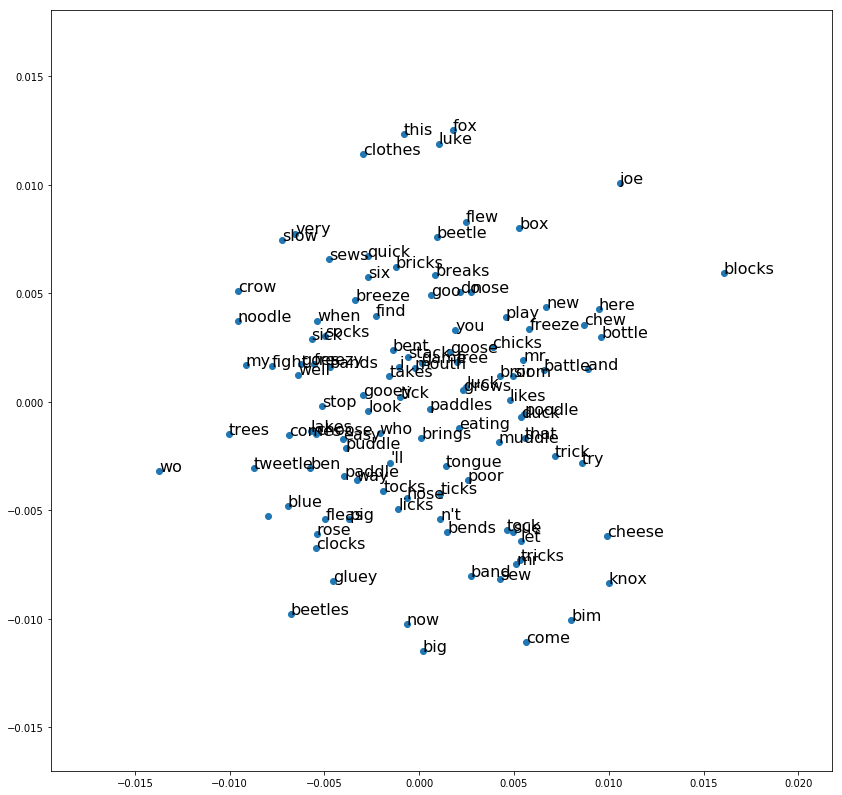

In [34]:
fig = plt.figure(figsize=(14, 14))
plt.scatter(new_vectors[:,0], new_vectors[:, 1])
for i, word in enumerate(model.wv.vocab):
    plt.annotate(word, xy=(new_vectors[i,0], new_vectors[i,1]), size=16)

# Topic Modeling

One branch of NLP is topic modeling - a topic model is a kind of statistical model that is used to uncover the abstract topics and concepts that occur in a collection of documents. Topic modeling is frequently used to discover semantic structures in a text body, and as a data-mining tool to better understand large collections of data.

Now that we've seen how spaCy processes short text segments, let's explore what happens (and what we can work with) when we examine a much larger document. To work with topic modeling, we'll begin by using `spaCy` to tokenize a text file containing US news articles.

In [35]:
%%time
import os
filename = r'C:\Users\caoa\Box Sync\coursera\Capstone\SwiftKeyProject\final\en_US\en_US.news.txt'
#filename = 'en_US.news.txt'
with open(filename, 'r', encoding='utf-8') as fin:
    data = fin.read()
data = data[:900000]

Wall time: 1.45 s


In [36]:
%%time
news = nlp(data)

Wall time: 43.4 s


As with any large text, we can't start analysis until we clean the data. This involves removing unimportant words and punctuation, begin by removing __stopwords__, which are commonly used words that have little value in determining sentiment or analyzing a document. Filtering out words like ‘the’, ‘is’, and ‘are’ helps speed up processes and helps keep the data clean while allowing us to focus on more significant/rarer terms. Luckily, each token has the built-in property `is_stop` to indicate whether or not it is considered a stopword.

Sometimes, in addition to removing stopwords, we'll want to remove punctuation from a piece. We may also choose to convert all words to lowercase or standardize dates and times. Note that the cleaning process will not be the same for every text or even for every analysis of the same text - sometimes we care about capitalization and punctuation as part of the sentiment and topic modeling analysis. For now, though, we'll remove the punctuation. We'll also remove any newline and possessive characters.

We need to create a list of lists for the tokens in each sentence for the next section.

In [37]:
text=[]
for sentence in news.sents:
    text.append([token.text for token in sentence 
                 if token.is_punct == False and token.is_stop == False and token.text not in ["\n","'s"]])
text[:5]

[['He', "n't", 'home', 'apparently'],
 ['The', 'St.', 'Louis', 'plant', 'close'],
 ['It', 'die', 'old', 'age'],
 ['Workers',
  'making',
  'cars',
  'onset',
  'mass',
  'automotive',
  'production',
  '1920s'],
 ['WSU', 'plans', 'quickly', 'hot', 'topic', 'local', 'online', 'sites']]

## LDA

Now that we've prepared our information for analysis, we'll use `gensim` to perform topic modelling. 

In [38]:
from gensim import corpora, models

We begin by creating a `gensim` dictionary containing (key, value) pairs which represent (word, integer id) respectively.

In [39]:
dictionary = corpora.Dictionary(text)
dictionary.token2id

{'He': 0,
 'apparently': 1,
 'home': 2,
 "n't": 3,
 'Louis': 4,
 'St.': 5,
 'The': 6,
 'close': 7,
 'plant': 8,
 'It': 9,
 'age': 10,
 'die': 11,
 'old': 12,
 '1920s': 13,
 'Workers': 14,
 'automotive': 15,
 'cars': 16,
 'making': 17,
 'mass': 18,
 'onset': 19,
 'production': 20,
 'WSU': 21,
 'hot': 22,
 'local': 23,
 'online': 24,
 'plans': 25,
 'quickly': 26,
 'sites': 27,
 'topic': 28,
 'Though': 29,
 'applauded': 30,
 'biomedical': 31,
 'building': 32,
 'center': 33,
 'deplored': 34,
 'loss': 35,
 'new': 36,
 'people': 37,
 'potential': 38,
 'Alaimo': 39,
 'Group': 40,
 'Holly': 41,
 'Mount': 42,
 'Trenton': 43,
 'Water': 44,
 'Works': 45,
 'contract': 46,
 'evaluate': 47,
 'fall': 48,
 'improvements': 49,
 'suggest': 50,
 '$': 51,
 '4,500': 52,
 'But': 53,
 'June': 54,
 'PAC': 55,
 'Partners': 56,
 'Progress': 57,
 'action': 58,
 'campaign': 59,
 'committee': 60,
 'donated': 61,
 'early': 62,
 'employees': 63,
 'finance': 64,
 'political': 65,
 'records': 66,
 'released': 67,
 'to

> To convert documents to vectors, we’ll use a document representation called bag-of-words. In this representation, each document is represented by one vector where each vector element represents a question-answer pair, in the style of:

> “How many times does the word system appear in the document? Once.”

The method `doc2bow` converts the document to a bag-of-words model by counting the number of occurrences of each distinct word, converts the word to its integer word id and returns the result as a sparse vector.

In [40]:
corpus = [dictionary.doc2bow(txt) for txt in text]
corpus[:3]

[[(0, 1), (1, 1), (2, 1), (3, 1)],
 [(4, 1), (5, 1), (6, 1), (7, 1), (8, 1)],
 [(9, 1), (10, 1), (11, 1), (12, 1)]]

Latent Dirichlet Allocation (LDA) is a generative statistical model. It is a pattern recognition and machine learning technique that works to find a linear combination of features that characterizes two or more classes of objects. We use it here to try to identify topics in our corpus.

In [41]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=30)

Below, we call `show_topics` to view N topics chosen randomly. Each topic contain the top 10 keywords that the LDA model has found. The word's coefficients represents its weight and the words are listed in descending order by weight.

In [42]:
lda.show_topics()

From these buzzwords, we can infer what general concept each "topic" is talking about. Take a minute to think about what each collection of keywords represents.

## Streaming Text

Above, we abbreviated the text document for time and memory sake. `spaCy` will complain if you try to feed it more than a 1 million character string. We can get around the memory issue by streaming the text one line at a time with the following generator function to achieve the same objective.

In [ ]:
def sentence_generator(filename, nlp):
    for line in open(filename, 'r', encoding='utf-8'):              
        news = nlp(line)
        for sentence in news.sents:
            yield [token.text for token in sentence 
                   if token.is_punct == False and token.is_stop == False and token.text not in ["\n","'s"]]

We create a generator by calling the function. The function returns a generator object (iterator) which we can iterate over (one value at a time) using `next` or a `for` loop.

In [ ]:
memory_friendly_text = sentence_generator(filename,nlp)
memory_friendly_text

Let's print out the contents.

In [ ]:
print(next(memory_friendly_text))
print(next(memory_friendly_text))
print(next(memory_friendly_text))
print(next(memory_friendly_text))

To use it when constructing a LDA model replace the variable `text` with the generator object `memory_friendly_text`.

## Visualization for Topic Modeling

Now that we have our topics and our keyword collections, we can present them in a visualization to get a different view on how important each topic is to the overall document, and how closely these topics are related. We will use the `pyLDAvis` library which is a port of the R package LDAvis.

In [44]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

pyLDAvis is compatible with `gensim`, `scikit-learn`, and `GraphLab Create`. Here is how you would use it with `gensim`. We need a `gensim` LDA model, corpus and dictionary - we'll use the ones we've just built.

In [45]:
viz = pyLDAvis.gensim.prepare(lda, corpus, dictionary)
viz

C:\Users\caoa\AppData\Local\Continuum\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
11     5.546285        1       1 -0.266634  0.042755
29     3.837550        1       2 -0.030575 -0.114225
8      3.785447        1       3  0.052905 -0.058822
1      3.692910        1       4 -0.053280 -0.070647
9      3.689612        1       5 -0.131062 -0.021758
16     3.686467        1       6  0.089418 -0.105973
23     3.502869        1       7  0.002153 -0.082320
15     3.482852        1       8  0.109527  0.022262
0      3.445015        1       9  0.017046 -0.025586
7      3.436752        1      10 -0.008277  0.042588
25     3.425799        1      11  0.002549 -0.073200
19     3.412050        1      12 -0.002907  0.039602
5      3.394997        1      13 -0.084047 -0.053476
18     3.345505        1      14  0.005698 -0.050005
13     3.233855        1      15 -0.010031 -0.040761
21     3.185307        1      16  0.030261  0.027724
27     3.141712        1      17 -0.009422  0.031292
24     3.091230        1      18  0.032428 -0.056981
2      3.090118        1      19 -0.038952  0.082119
6      3.088397        1      20 -0.001902  0.020158
10     3.072344        1      21 -0.036480  0.024059
17     3.039171        1      22  0.045307 -0.010658
14     3.037073        1      23  0.000136 -0.037495
4      3.032580        1      24  0.080284  0.050931
3      3.032240        1      25  0.008076  0.103749
20     3.027875        1      26  0.002232  0.019122
26     2.939867        1      27  0.088271  0.013473
22     2.889218        1      28  0.027130  0.183330
12     2.780967        1      29  0.009431  0.067201
28     2.633939        1      30  0.070721  0.031540, topic_info=      Category        Freq       Term       Total  loglift  logprob
term                                                               
323    Default  767.000000          I  767.000000  30.0000  30.0000
51     Default  361.000000          $  361.000000  29.0000  29.0000
3      Default  375.000000        n't  375.000000  28.0000  28.0000
1210   Default  153.000000          A  153.000000  27.0000  27.0000
244    Default  119.000000    million  119.000000  26.0000  26.0000
931    Default  106.000000       That  106.000000  25.0000  25.0000
147    Default  191.000000         ’s  191.000000  24.0000  24.0000
5      Default   75.000000        St.   75.000000  23.0000  23.0000
3138   Default   69.000000         No   69.000000  22.0000  22.0000
94     Default   92.000000      think   92.000000  21.0000  21.0000
445    Default   82.000000         'm   82.000000  20.0000  20.0000
1882   Default  129.000000    percent  129.000000  19.0000  19.0000
145    Default  892.000000       said  892.000000  18.0000  18.0000
1766   Default   76.000000        end   76.000000  17.0000  17.0000
892    Default   89.000000       know   89.000000  16.0000  16.0000
0      Default  256.000000         He  256.000000  15.0000  15.0000
368    Default  198.000000         We  198.000000  14.0000  14.0000
665    Default   86.000000          2   86.000000  13.0000  13.0000
122    Default  187.000000      years  187.000000  12.0000  12.0000
6      Default  853.000000        The  853.000000  11.0000  11.0000
249    Default  149.000000          1  149.000000  10.0000  10.0000
114    Default  140.000000      going  140.000000   9.0000   9.0000
523    Default   52.000000     health   52.000000   8.0000   8.0000
833    Default  126.000000     season  126.000000   7.0000   7.0000
53     Default  213.000000        But  213.000000   6.0000   6.0000
1016   Default   85.000000        've   85.000000   5.0000   5.0000
110    Default   89.000000        day   89.000000   4.0000   4.0000
688    Default  182.000000       like  182.000000   3.0000   3.0000
1055   Default  103.000000       They  103.000000   2.0000   2.0000
477    Default   44.000000    schools   44.000000   1.0000   1.0000
...        ...         ...        ...         ...      ...      ...
3017   Topic30   

Each bubble on the large plot represents a topic. The larger the bubble, the more frequently that topic is referenced. Ideally, we want large topic bubbles that are well separated and do not overlap with one another. A model with too many topics will have many overlaps and will be made up of many small sized bubbles clustered in one region of the chart. It appears that this particular dataset (with this analysis) doesn't have as clear separations as we'd like, and falls into the "too many topics" category.

The visualization is also interactive - if you hover over a bubble, it highlights the terms that the topic includes, and shows their frequency (both overall and within the selected topic).

Visit https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/ for additional resources and work with topic modelling in `Gensim`.

## Sentiment Analysis

`TextBlob` is another NLP library in Python. It is written entirely in Python, which docks its performance speed and high-processing ability a bit. TextBlob is a bit of a "best of the best" toolkit - it pulls some of the most effective and useful methods from packages like NLTK and Pattern. Here, we'll use it to perform sentiment analysis.

In [46]:
from textblob import TextBlob

In [47]:
flowers = TextBlob('These flowers are beautiful, they brighten up the place so much! I really love them.')
angry = TextBlob('You make me so angry; I just can\'t stand it.')

The `sentiment` attribute of a TextBlob "returns a tuple of the form (polarity, subjectivity) where polarity is a float within the range [-1.0, 1.0] and subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective."

Let's break this into its two parts: polarity and subjectivity. Polarity analysis takes into account the amount of positive or negative terms that appear in a given sentence - words like "beautiful" and "brighten" likely contribute to a higher score, while words like "angry" and "can't" would shift the polarity in a negative direction. Subjectivity, on the other hand, is almost like an error bound on the sentiment analysis. The subjectivity of words and phrases may depend on their context and an objective document may contain subjective sentences. Words and phrases that are labeled as more subjective may shift their polarity depending on their context, making it more difficult to determine the true sentiment of the phrase.

In [48]:
print(flowers.sentiment)
print(angry.sentiment)

Sentiment(polarity=0.675, subjectivity=0.8)
Sentiment(polarity=-0.5, subjectivity=1.0)


To see the breakdown of the numbers, we can use the `sentiment_assessments` attribute to view which words contributed to the polarity and subjectivity scores. The overall score is the average of each tuple in the assessment.

In [49]:
print(flowers.sentiment_assessments)
print(angry.sentiment_assessments)

Sentiment(polarity=0.675, subjectivity=0.8, assessments=[(['beautiful'], 0.85, 1.0, None), (['much', '!', 'really', 'love'], 0.5, 0.6, None)])
Sentiment(polarity=-0.5, subjectivity=1.0, assessments=[(['angry'], -0.5, 1.0, None)])


## Exercise

Test out a couple of different sentences and examine their sentiment analysis output. Try to write:
* A sentence that scores a neutral polarity (aim for a range in [-0.2, 0.2])
* A sentence that scores as highly _objective_
* A sentence that scores as highly _subjective_

In [30]:
#Solution

### Sentiment Analysis for US News

Now that we've seen how TextBlob sentiment analysis works on a few lines of text, we can see what polarity and subjectivity scores it assigns to the news dataset that we've been working with.

In [53]:
news_txt = TextBlob(data)
news_txt.sentiment

Sentiment(polarity=0.10219093467161112, subjectivity=0.43409946705408897)

# References

* spaCy: https://spacy.io/usage/spacy-101
* textacy: https://textacy.readthedocs.io/en/stable/
* Gensim: https://radimrehurek.com/gensim/intro.html
* TextBlob: http://textblob.readthedocs.io/en/dev/quickstart.html
* pyLDAvis: http://pyldavis.readthedocs.io/en/latest/